<a href="https://colab.research.google.com/github/sanhiitaa/salary-prediction/blob/main/salary_prediction_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
# data handling and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data preparation libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# model training libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# metric library
from sklearn import metrics

# setting a random seed for reproducability
np.random.seed(1111)

# Loading the dataset

In [2]:
df=pd.read_csv('/content/salary_data_cleaned.csv')
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,years_experience
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2
1,F,Associate,25.0,89207,Web,22.0,13.0,2.0,7,3
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,3
4,M,Analyst,25.0,43161,Operations,27.0,3.0,2.0,3,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               2478 non-null   object 
 1   DESIGNATION       2478 non-null   object 
 2   AGE               2478 non-null   float64
 3   SALARY            2478 non-null   int64  
 4   UNIT              2478 non-null   object 
 5   LEAVES USED       2478 non-null   float64
 6   LEAVES REMAINING  2478 non-null   float64
 7   RATINGS           2478 non-null   float64
 8   PAST EXP          2478 non-null   int64  
 9   years_experience  2478 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 193.7+ KB


# Splitting the data

In [4]:
# splitting the data into dependent and independent variables
X=df.drop('SALARY',axis=1)
y=df['SALARY']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1734, 9), (744, 9), (1734,), (744,))

# Encoding data

In [7]:
df.DESIGNATION.value_counts()

DESIGNATION
Analyst           1854
Senior Analyst     301
Associate          156
Manager             79
Senior Manager      61
Director            27
Name: count, dtype: int64

In [8]:
df.SEX.value_counts()

SEX
F    1259
M    1219
Name: count, dtype: int64

In [9]:
df.UNIT.value_counts()

UNIT
IT            437
Finance       417
Operations    416
Marketing     411
Web           400
Management    397
Name: count, dtype: int64

In [10]:
# label encoding sex and unit column
label_cols=['SEX', 'UNIT']
for cols in label_cols:
  le=LabelEncoder()
  x_train[cols]= le.fit_transform(x_train[cols])
  x_test[cols]= le.transform(x_test[cols])

In [11]:
# ordinal encoding designation column
desired_order=[['Analyst', 'Associate', 'Senior Analyst', 'Manager', 'Senior Manager', 'Director']]
ordinal_encoder = OrdinalEncoder(categories=desired_order)
x_train['DESIGNATION'] = ordinal_encoder.fit_transform(x_train[['DESIGNATION']])
x_test['DESIGNATION'] = ordinal_encoder.transform(x_test[['DESIGNATION']])

In [12]:
x_train.head()

,SEX,DESIGNATION,AGE,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,years_experience
646,0,0.0,25.0,1,24.0,6.0,3.0,1,3
1074,1,0.0,22.0,3,24.0,6.0,2.0,0,2
244,0,0.0,25.0,1,27.0,3.0,5.0,1,3
2071,1,0.0,25.0,3,26.0,4.0,2.0,2,3
1780,1,0.0,23.0,0,23.0,7.0,3.0,0,3


# Feature selection

In [13]:
# selecting best 6 features
selector= SelectKBest(score_func = f_regression, k=6)
x_train_new = selector.fit_transform(x_train, y_train)
x_test_new = selector.transform(x_test)

In [14]:
# extracting feature names
selector.get_feature_names_out()

array(['SEX', 'DESIGNATION', 'AGE', 'UNIT', 'PAST EXP',
       'years_experience'], dtype=object)

In [15]:
# reassigning the selected features to training and test dataset
x_train_new= pd.DataFrame(x_train_new, columns=selector.get_feature_names_out())
x_test_new= pd.DataFrame(x_test_new, columns=selector.get_feature_names_out())

In [16]:
x_train_new.head()

,SEX,DESIGNATION,AGE,UNIT,PAST EXP,years_experience
0,0.0,0.0,25.0,1.0,1.0,3.0
1,1.0,0.0,22.0,3.0,0.0,2.0
2,0.0,0.0,25.0,1.0,1.0,3.0
3,1.0,0.0,25.0,3.0,2.0,3.0
4,1.0,0.0,23.0,0.0,0.0,3.0


# handling outliers (not including this step for this dataset)

In [ ]:
# def outlier_cal(y):
#   '''
#   y is a pandas dataframe
#   '''
#   outliers=[]
#   for col in y.columns:
#     if y[col].dtype != 'object':
#       q1=y[col].quantile(0.25)
#       q3=y[col].quantile(0.75)

#       iqr=q3-q1

#       upper=q3+(1.5*iqr)
#       lower=q1-(1.5*iqr)
#       feature_outliers = np.where((y[col] < lower) | (y[col] > upper))[0]
#       outliers.extend(feature_outliers)
#   return np.unique(outliers)

In [ ]:
# outliers = outlier_cal(x_train)
# print("Indices of outliers:", outliers)


Indices of outliers: [   2    3    7   15   26   28   31   33   34   40   43   45   48   53
   54   57   59   67   72   80   82   87   91   94   95   96   97  101
  103  104  106  109  111  113  114  115  119  120  127  130  144  149
  152  153  161  162  167  179  185  186  187  189  193  198  199  201
  203  209  217  222  229  230  232  233  241  243  247  249  258  260
  265  267  268  271  272  282  283  286  287  293  294  296  298  310
  314  318  325  327  338  340  346  349  350  358  360  367  368  370
  375  379  382  384  389  390  397  399  401  403  406  409  415  423
  424  426  431  433  436  438  449  450  453  459  461  462  464  467
  470  471  481  487  492  495  507  511  512  519  522  523  524  529
  537  539  541  543  544  546  550  551  557  561  563  565  574  581
  585  586  591  593  595  601  605  606  608  611  612  615  617  618
  619  625  647  652  653  657  659  660  664  666  667  673  676  677
  680  682  684  686  688  690  697  704  705  712  718 

In [ ]:
# x_train_no_outliers = x_train[~np.isin(np.arange(len(x_train)), outliers)]
# y_train_no_outliers = y_train[~np.isin(np.arange(len(y_train)), outliers)]

In [ ]:
# outliers_test= outlier_cal(x_test)
# print("Indices of outliers:", outliers_test)

Indices of outliers: [  2   5  16  28  50  51  54  63  67  82  90 114 119 124 126 129 131 132
 143 145 147 171 173 189 204 205 211 212 215 217 219 227 232 236 255 257
 272 279 294 306 310 319 337 338 339 343 366 367 372 403 405 408 420 436
 437 442 460 461 471 473 477 480 509 522 545 554 560 564 572 580 581 583
 584 592 595 598 601 605 606 618 620 621 639 657 658 662 671 681 686 689
 690 699 711 716 718 722 724 731]


In [ ]:
# x_test_no_outliers = x_test[~np.isin(np.arange(len(x_test)), outliers)]
# y_test_no_outliers = y_test[~np.isin(np.arange(len(y_test)), outliers)]

In [ ]:
# x_train_no_outliers.shape, x_test_no_outliers.shape, y_train_no_outliers.shape, y_test_no_outliers.shape

((1305, 9), (548, 9), (1305,), (548,))

# Correlation study

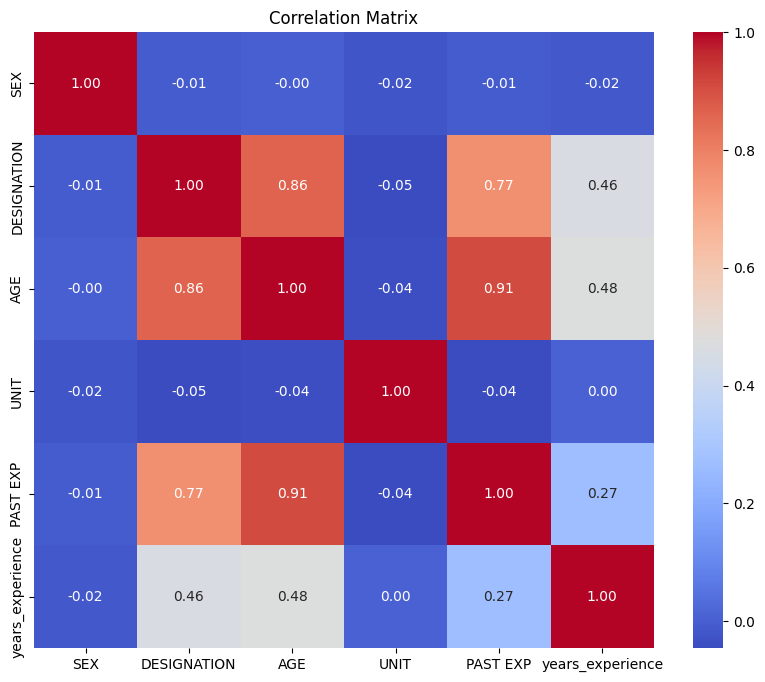

In [17]:
corr_matrix= x_train_new.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# dropping columns with correlation exceeding [-0.8,0.8]
x_train_new = x_train.drop(columns=['AGE'])
x_test_new = x_test.drop(columns=['AGE'])

# Models

## Helper functions to streamline the process

In [19]:
def scorer(model_name, dictionary_name, y_test, pred):
  '''
    A metric scorer for regression tasks

    This function takes the following arguments:
    - model_name: a string representing the name of the model.
    - dictionary_name: a dictionary where the scores will be stored.
    - y_test: a pandas Series or array representing the true target values for the test set.
    - pred: a pandas Series or array representing the predicted target values for the test set.

    The function calculates Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R2 score for the model,
    stores them in the provided dictionary under the key of the model name, and returns the dictionary.

  '''
  from sklearn import metrics
  dictionary_name[model_name]={'Mean Absolute Error' : metrics.mean_absolute_error(y_test, pred),
                              'Mean Squared Error' : metrics.mean_squared_error(y_test, pred),
                              'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, pred)),
                              'R2 score' : metrics.r2_score(y_test,pred)}
  return dictionary_name[model_name]

In [20]:
def train_test_score_compare(model, x_train, x_test, y_train, y_test):
  from sklearn import metrics
  model.fit(x_train, y_train)

  # Predict
  y_pred_train = model.predict(x_train_new)
  y_pred_test = model.predict(x_test_new)

  # Evaluate the model
  mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  r2_train = r2_score(y_train, y_pred_train)

  mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
  mse_test = mean_squared_error(y_test, y_pred_test)
  r2_test = r2_score(y_test, y_pred_test)

  print(f"{model} values:")
  print("Train MAE:", mae_train)
  print("Train MSE:", mse_train)
  print("Train R2:", r2_train)
  print("Test MAE:", mae_test)
  print("Test MSE:", mse_test)
  print("Test R2:", r2_test)

## Defining a `scores` dataframe to store model scores.

In [21]:
# defining a score dataframe for model scores for comparison later
scores = pd.DataFrame()
pd.set_option('display.float_format', lambda x: '%.12f' % x)

## Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=2, max_iter=10000)
lasso.fit(x_train_new,y_train)
pred=lasso.predict(x_test_new)

In [23]:
scorer('Lasso Regression', scores, y_test, pred)

Mean Absolute Error            9093.064984996816
Mean Squared Error        161629352.924977660179
Root Mean Squared Error       12713.353331241040
R2 score                          0.823429504510
Name: Lasso Regression, dtype: float64

In [24]:
train_test_score_compare(lasso, x_train_new, x_test_new, y_train, y_test)

Lasso(alpha=2, max_iter=10000) values:
Train MAE: 9838.065044055245
Train MSE: 268445718.9744407
Train R2: 0.825646177667023
Test MAE: 9093.064984996816
Test MSE: 161629352.92497766
Test R2: 0.8234295045101444


## Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train_new,y_train)
pred=rf.predict(x_test_new)

In [26]:
scorer('Random Forest Regressor', scores, y_test, pred)

Mean Absolute Error           4434.525715587130
Mean Squared Error        53427576.224574737251
Root Mean Squared Error       7309.416955173288
R2 score                         0.941633537250
Name: Random Forest Regressor, dtype: float64

In [27]:
train_test_score_compare(rf, x_train_new, x_test_new, y_train, y_test)

RandomForestRegressor() values:
Train MAE: 1784.4180150560223
Train MSE: 11047564.441979023
Train R2: 0.9928246757099065
Test MAE: 4458.201735812425
Test MSE: 53882851.29501894
Test R2: 0.9411361761994815


## Gradient Boosting Machine

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train_new,y_train)
pred=gbr.predict(x_test_new)

In [29]:
scorer('Gradient Boosting Regressor', scores, y_test, pred)

Mean Absolute Error           4096.126598626272
Mean Squared Error        46235380.812073223293
Root Mean Squared Error       6799.660345346172
R2 score                         0.949490584777
Name: Gradient Boosting Regressor, dtype: float64

In [30]:
train_test_score_compare(gbr, x_train_new, x_test_new, y_train, y_test)

GradientBoostingRegressor() values:
Train MAE: 3566.792913437127
Train MSE: 24584753.521906987
Train R2: 0.9840323557252678
Test MAE: 4088.937718146057
Test MSE: 45589950.21463612
Test R2: 0.9501956794785129


## XGboost

In [31]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(x_train_new,y_train)
pred=xgb.predict(x_test_new)

In [32]:
scorer('XGBoost Regressor', scores, y_test, pred)

Mean Absolute Error           4660.627037130376
Mean Squared Error        69785339.797168895602
Root Mean Squared Error       8353.762014635615
R2 score                         0.923763649344
Name: XGBoost Regressor, dtype: float64

In [33]:
train_test_score_compare(xgb, x_train_new, x_test_new, y_train, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) values:
Train MAE: 1487.5832161908882
Train MSE: 3671618.4132514964
Train R2: 0.9976153067110022
Test MAE: 4660.627037130376
Test MSE: 69785339.7971689
Test R2: 0.9237636493438572


## Support Vector Regression

In [34]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_new,y_train)
pred=svr.predict(x_test_new)

In [35]:
scorer('Support Vector Regression', scores, y_test, pred)

Mean Absolute Error            13653.628635801580
Mean Squared Error        1019839494.191852211952
Root Mean Squared Error        31934.925930583464
R2 score                          -0.114114246892
Name: Support Vector Regression, dtype: float64

In [36]:
train_test_score_compare(svr, x_train_new, x_test_new, y_train, y_test)

SVR() values:
Train MAE: 15126.221591272975
Train MSE: 1677338011.253133
Train R2: -0.08942059021705795
Test MAE: 13653.62863580158
Test MSE: 1019839494.1918522
Test R2: -0.11411424689154415


## K-nearest Neighbours Regression

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train_new,y_train)
pred=knn.predict(x_test_new)

In [38]:
scorer('K-Nearest Neighbour Regression', scores, y_test, pred)

Mean Absolute Error            6435.317741935484
Mean Squared Error        164201263.763440847397
Root Mean Squared Error       12814.104095231974
R2 score                          0.820619844242
Name: K-Nearest Neighbour Regression, dtype: float64

In [39]:
train_test_score_compare(knn, x_train_new, x_test_new, y_train, y_test)

KNeighborsRegressor() values:
Train MAE: 5427.3731257208765
Train MSE: 136454364.41815454
Train R2: 0.9113737402808519
Test MAE: 6435.317741935484
Test MSE: 164201263.76344085
Test R2: 0.8206198442418516


# Visualizing score to select the best performing model

In [40]:
scores

,Lasso Regression,Random Forest Regressor,Gradient Boosting Regressor,XGBoost Regressor,Support Vector Regression,K-Nearest Neighbour Regression
Mean Absolute Error,9093.064984996816,4434.525715587130,4096.126598626272,4660.627037130376,13653.628635801580,6435.317741935484
Mean Squared Error,161629352.924977660179,53427576.224574737251,46235380.812073223293,69785339.797168895602,1019839494.191852211952,164201263.763440847397
Root Mean Squared Error,12713.353331241040,7309.416955173288,6799.660345346172,8353.762014635615,31934.925930583464,12814.104095231974
R2 score,0.823429504510,0.941633537250,0.949490584777,0.923763649344,-0.114114246892,0.820619844242


In [41]:
scores_trans= scores.T


Text(0.5, 1.0, 'Mean Absolute Error')

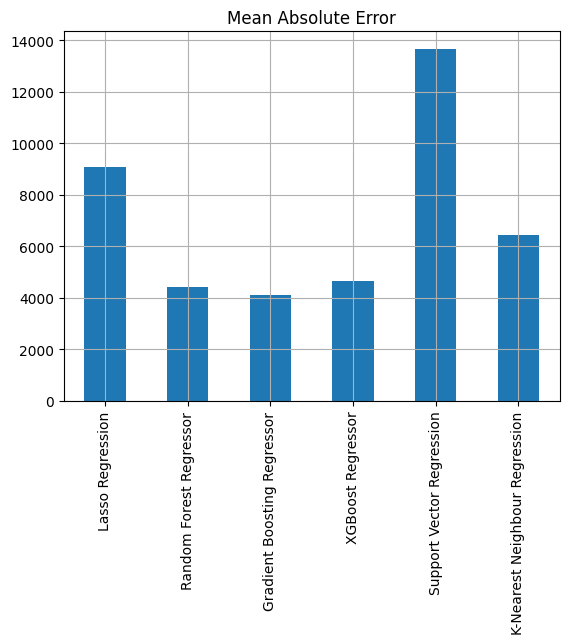

In [49]:
scores_trans['Mean Absolute Error'].plot(kind= 'bar')
plt.grid(True)
plt.title('Mean Absolute Error')

Text(0.5, 1.0, 'Mean Squared Error')

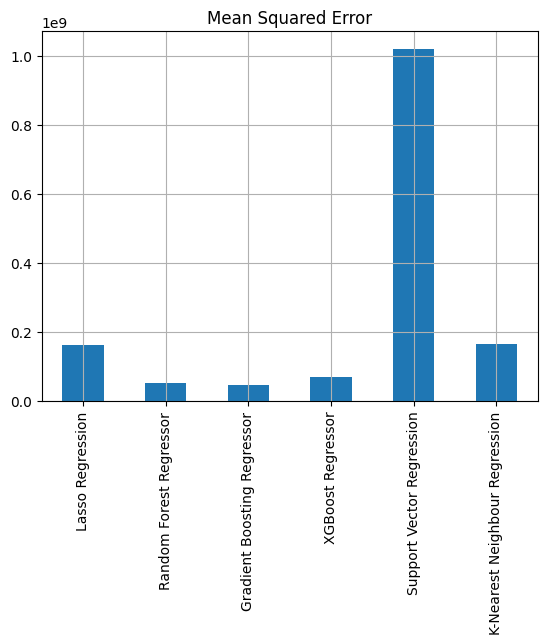

In [50]:
scores_trans['Mean Squared Error'].plot(kind= 'bar')
plt.grid(True)
plt.title('Mean Squared Error')

Text(0.5, 1.0, 'Root Mean Squared Error')

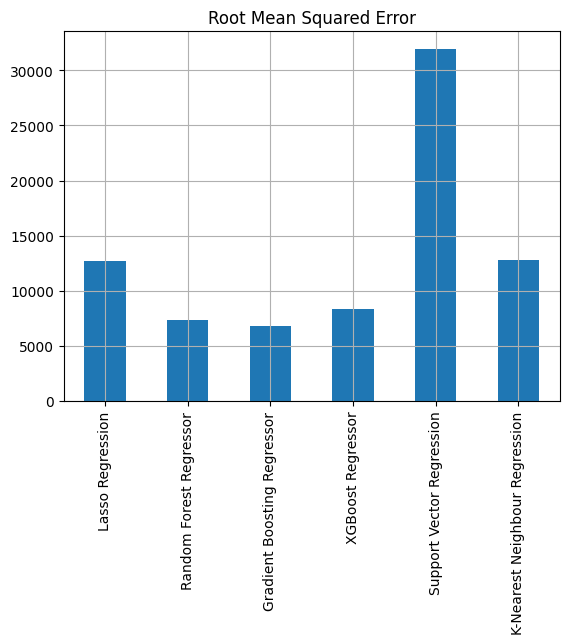

In [51]:
scores_trans['Root Mean Squared Error'].plot(kind= 'bar')
plt.grid(True)
plt.title('Root Mean Squared Error')

Text(0.5, 1.0, 'R2 score')

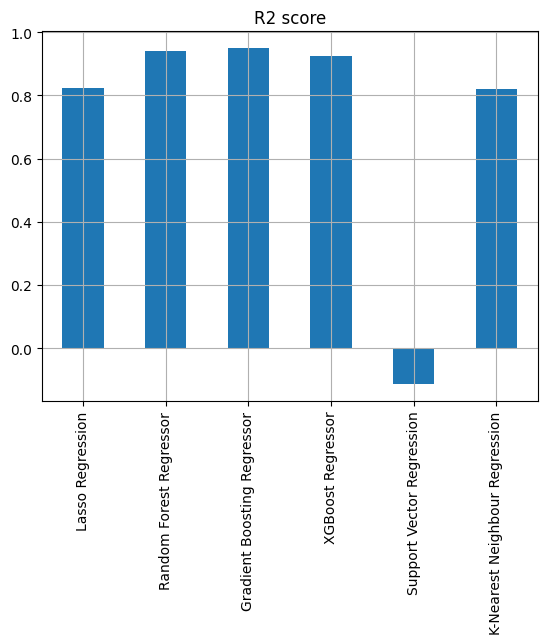

In [52]:
scores_trans['R2 score'].plot(kind= 'bar')
plt.grid(True)
plt.title('R2 score')



---



# Best performing model:
> `Gradient Boosting Regressor` with an R2 score of `0.949490584777`.


